# Robust Breast Cancer Predictor (BCP)

### About Dataset
##### Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. ##### They describe characteristics of the cell nuclei present in the image.
##### n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

##### This database is also available through the UW CS ftp server:
##### ftp ftp.cs.wisc.edu
##### cd math-prog/cpo-dataset/machine-learn/WDBC/

##### Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

### Attribute Information:

##### 1) ID number
##### 2) Diagnosis (M = malignant, B = benign)
##### 3) 32

### Ten real-valued features are computed for each cell nucleus:

##### a) radius (mean of distances from center to points on the perimeter)
##### b) texture (standard deviation of gray-scale values)
##### c) perimeter
##### d) area
##### e) smoothness (local variation in radius lengths)
##### f) compactness (perimeter^2 / area - 1.0)
##### g) concavity (severity of concave portions of the contour)
##### h) concave points (number of concave portions of the contour)
##### i) symmetry
##### j) fractal dimension ("coastline approximation" - 1)

##### The mean, standard error and "worst" or largest (mean of the three
##### largest values) of these features were computed for each image,
##### resulting in 30 features. For instance, field 3 is Mean Radius, field
##### 13 is Radius SE, field 23 is Worst Radius.

##### All feature values are recoded with four significant digits.

##### Missing attribute values: none

##### Class distribution: 357 benign, 212 malignant

# Step 1: Input Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

# Step 2: Load and Prepare the Dataset

In [3]:
# Load dataset
df = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
# Map 'M' (malignant) to 1 and 'B' (benign) to 0
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [5]:
# Drop unnecessary columns
df = df.drop(columns=['id', 'Unnamed: 32'])

# Step 3: Handle Missing Values

In [6]:
# Check for missing values in the target variable
print("Missing values in 'diagnosis':", df['diagnosis'].isna().sum())

Missing values in 'diagnosis': 0


In [7]:
# Drop rows with missing target values
df = df.dropna(subset=['diagnosis'])

# Step 4: Define Features and Split the Dataset

In [8]:
# Define feature columns
features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
            'compactness_mean', 'concavity_mean', 'concave points_mean',
            'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
            'compactness_worst', 'concavity_worst', 'concave points_worst',
            'symmetry_worst', 'fractal_dimension_worst']
X = df[features]
y = df['diagnosis']

In [9]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Define the Classes

In [10]:
class DynamicAdaptiveLearner:
    def __init__(self):
        self.classifier = RandomForestClassifier()

    def fit(self, X, y):
        print("Fitting model...")
        self.classifier.fit(X, y)

    def predict(self, X):
        return self.classifier.predict(X)

    def predict_proba(self, X):
        return self.classifier.predict_proba(X)

In [11]:
class AdaptiveIncrementalLearningForDynamicEnvironments:
    def __init__(self, base_classifier):
        self.base_classifier = base_classifier
        self.current_round = 0
        self.X_buffer = []
        self.y_buffer = []

    def _update_classifier(self):
        if self.X_buffer:
            print(f"Updating classifier at round {self.current_round}...")
            self.base_classifier.fit(self.X_buffer, self.y_buffer)
            self.X_buffer = []
            self.y_buffer = []

    def passive_learn(self, X, y):
        for x, label in zip(X.values, y.values):
            self.X_buffer.append(x)
            self.y_buffer.append(label)
        self._update_classifier()
        self.current_round += 1

    def predict(self, X):
        return self.base_classifier.predict(X)

    def predict_proba(self, X):
        return self.base_classifier.predict_proba(X)

In [12]:
class DynamicAdaptiveLearnerSVM:
    def __init__(self):
        self.classifier = SVC(probability=True)

    def fit(self, X, y):
        print("Fitting SVM model...")
        self.classifier.fit(X, y)

    def predict(self, X):
        return self.classifier.predict(X)

    def predict_proba(self, X):
        return self.classifier.predict_proba(X)

# Step 6: Initialize and Train the Model

In [13]:
# Initialize the DAL classifier for AIDLE
dal_classifier = DynamicAdaptiveLearner()
aidle_classifier = AdaptiveIncrementalLearningForDynamicEnvironments(dal_classifier)

In [14]:
# Simulate passive learning by incrementally updating the model
num_rounds = 10
data_per_round = len(X_train) // num_rounds

In [15]:
train_accuracy = []
test_accuracy = []

In [16]:
for i in range(num_rounds):
    start_index = i * data_per_round
    end_index = (i + 1) * data_per_round if i < num_rounds - 1 else len(X_train)
    X_subset = X_train.iloc[start_index:end_index]
    y_subset = y_train.iloc[start_index:end_index]

    aidle_classifier.passive_learn(X_subset, y_subset)

    y_train_pred = aidle_classifier.predict(X_train)
    y_test_pred = aidle_classifier.predict(X_test)

    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_test_pred))

# Debugging: Print lengths to ensure they match
print(f"Length of train_accuracy: {len(train_accuracy)}")
print(f"Length of test_accuracy: {len(test_accuracy)}")
print(f"Expected number of rounds: {num_rounds}")

Updating classifier at round 0...
Fitting model...
Updating classifier at round 1...
Fitting model...
Updating classifier at round 2...
Fitting model...
Updating classifier at round 3...
Fitting model...
Updating classifier at round 4...
Fitting model...
Updating classifier at round 5...
Fitting model...
Updating classifier at round 6...
Fitting model...
Updating classifier at round 7...
Fitting model...
Updating classifier at round 8...
Fitting model...
Updating classifier at round 9...
Fitting model...
Length of train_accuracy: 10
Length of test_accuracy: 10
Expected number of rounds: 10


In [17]:
# Initialize the classifiers
dal_classifier_rf = DynamicAdaptiveLearner()
aidle_classifier_rf = AdaptiveIncrementalLearningForDynamicEnvironments(dal_classifier_rf)

dal_classifier_svm = DynamicAdaptiveLearnerSVM()
aidle_classifier_svm = AdaptiveIncrementalLearningForDynamicEnvironments(dal_classifier_svm)

# Simulate passive learning by incrementally updating the models
num_rounds = 10
data_per_round = len(X_train) // num_rounds

train_accuracy_rf = []
test_accuracy_rf = []
train_accuracy_svm = []
test_accuracy_svm = []

for i in range(num_rounds):
    start_index = i * data_per_round
    end_index = (i + 1) * data_per_round if i < num_rounds - 1 else len(X_train)
    X_subset = X_train.iloc[start_index:end_index]
    y_subset = y_train.iloc[start_index:end_index]

    # Train and predict with RandomForest
    aidle_classifier_rf.passive_learn(X_subset, y_subset)
    y_train_pred_rf = aidle_classifier_rf.predict(X_train)
    y_test_pred_rf = aidle_classifier_rf.predict(X_test)

    train_accuracy_rf.append(accuracy_score(y_train, y_train_pred_rf))
    test_accuracy_rf.append(accuracy_score(y_test, y_test_pred_rf))

    # Train and predict with SVM
    aidle_classifier_svm.passive_learn(X_subset, y_subset)
    y_train_pred_svm = aidle_classifier_svm.predict(X_train)
    y_test_pred_svm = aidle_classifier_svm.predict(X_test)

    train_accuracy_svm.append(accuracy_score(y_train, y_train_pred_svm))
    test_accuracy_svm.append(accuracy_score(y_test, y_test_pred_svm))

Updating classifier at round 0...
Fitting model...
Updating classifier at round 0...
Fitting SVM model...
Updating classifier at round 1...
Fitting model...
Updating classifier at round 1...
Fitting SVM model...
Updating classifier at round 2...
Fitting model...
Updating classifier at round 2...
Fitting SVM model...
Updating classifier at round 3...
Fitting model...
Updating classifier at round 3...
Fitting SVM model...
Updating classifier at round 4...
Fitting model...
Updating classifier at round 4...
Fitting SVM model...
Updating classifier at round 5...
Fitting model...
Updating classifier at round 5...
Fitting SVM model...
Updating classifier at round 6...
Fitting model...
Updating classifier at round 6...
Fitting SVM model...
Updating classifier at round 7...
Fitting model...
Updating classifier at round 7...
Fitting SVM model...
Updating classifier at round 8...
Fitting model...
Updating classifier at round 8...
Fitting SVM model...
Updating classifier at round 9...
Fitting mode

In [18]:
# Debugging: Print lengths to ensure they match
print(f"Length of train_accuracy_rf: {len(train_accuracy_rf)}")
print(f"Length of test_accuracy_rf: {len(test_accuracy_rf)}")
print(f"Length of train_accuracy_svm: {len(train_accuracy_svm)}")
print(f"Length of test_accuracy_svm: {len(test_accuracy_svm)}")
print(f"Expected number of rounds: {num_rounds}")

Length of train_accuracy_rf: 10
Length of test_accuracy_rf: 10
Length of train_accuracy_svm: 10
Length of test_accuracy_svm: 10
Expected number of rounds: 10


# Step 7: Evaluate Performance and Visualize Results

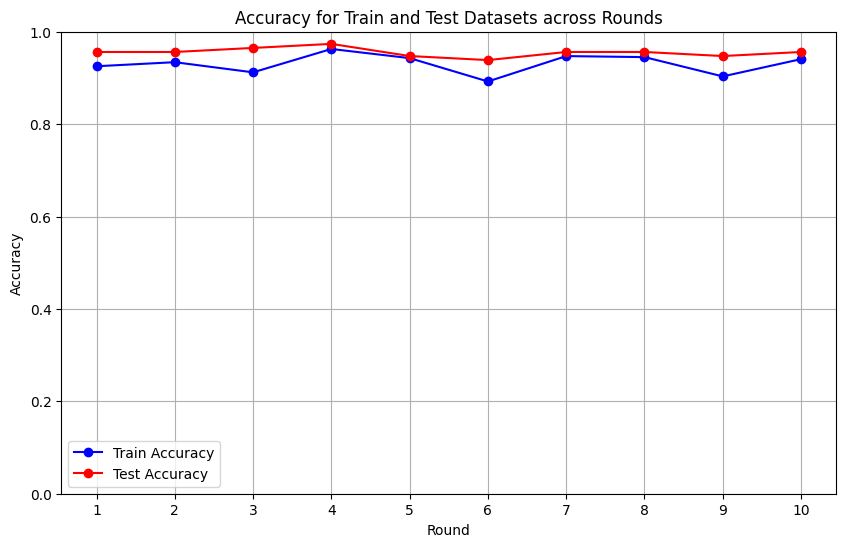

In [19]:
# Plotting accuracy
rounds = range(1, num_rounds + 1)

plt.figure(figsize=(10, 6))
plt.plot(rounds, train_accuracy, marker='o', linestyle='-', color='b', label='Train Accuracy')
plt.plot(rounds, test_accuracy, marker='o', linestyle='-', color='r', label='Test Accuracy')

plt.title('Accuracy for Train and Test Datasets across Rounds')
plt.xlabel('Round')
plt.ylabel('Accuracy')
plt.xticks(rounds)
plt.legend()
plt.grid(True)
plt.ylim(0, 1)  # Ensure y-axis ranges from 0 to 1 for better accuracy visualization
plt.show()

In [20]:
# Calculate final training and test accuracies
final_train_accuracy = accuracy_score(y_train, y_train_pred)
final_test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Final Training Accuracy: {final_train_accuracy:.4f}")
print(f"Final Test Accuracy: {final_test_accuracy:.4f}")

Final Training Accuracy: 0.9407
Final Test Accuracy: 0.9561


In [21]:
# Calculate RMSE
y_pred = aidle_classifier.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.4f}")

RMSE: 0.2094


In [22]:
# Calculate additional metrics
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Confusion Matrix:
[[70  1]
 [ 4 39]]
Precision: 0.9750
Recall: 0.9070


# Comparison 2 different algorithms

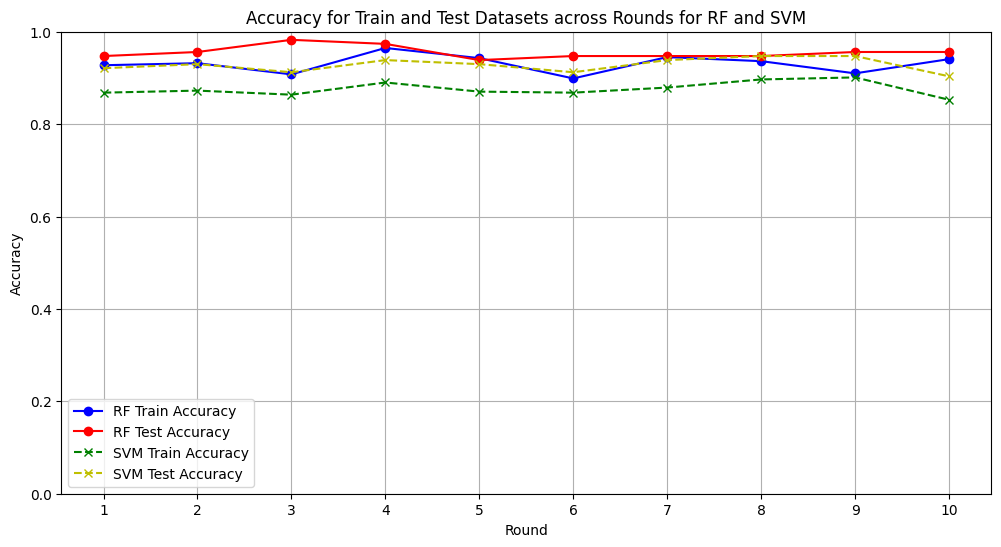

In [23]:
# Plotting accuracy
rounds = range(1, num_rounds + 1)

plt.figure(figsize=(12, 6))
plt.plot(rounds, train_accuracy_rf, marker='o', linestyle='-', color='b', label='RF Train Accuracy')
plt.plot(rounds, test_accuracy_rf, marker='o', linestyle='-', color='r', label='RF Test Accuracy')
plt.plot(rounds, train_accuracy_svm, marker='x', linestyle='--', color='g', label='SVM Train Accuracy')
plt.plot(rounds, test_accuracy_svm, marker='x', linestyle='--', color='y', label='SVM Test Accuracy')

plt.title('Accuracy for Train and Test Datasets across Rounds for RF and SVM')
plt.xlabel('Round')
plt.ylabel('Accuracy')
plt.xticks(rounds)
plt.legend()
plt.grid(True)
plt.ylim(0, 1)  # Ensure y-axis ranges from 0 to 1 for better accuracy visualization
plt.show()

In [24]:
# Calculate final metrics for RandomForest
final_train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
final_test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
conf_matrix_rf = confusion_matrix(y_test, y_test_pred_rf)
precision_rf = precision_score(y_test, y_test_pred_rf)
recall_rf = recall_score(y_test, y_test_pred_rf)
f1_rf = f1_score(y_test, y_test_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_test_pred_rf)

print("RandomForest Metrics")
print(f"Final Training Accuracy: {final_train_accuracy_rf:.4f}")
print(f"Final Test Accuracy: {final_test_accuracy_rf:.4f}")
print(f"RMSE: {rmse_rf:.4f}")
print(f"Confusion Matrix:\n{conf_matrix_rf}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")
print(f"ROC-AUC Score: {roc_auc_rf:.4f}")

RandomForest Metrics
Final Training Accuracy: 0.9407
Final Test Accuracy: 0.9561
RMSE: 0.2094
Confusion Matrix:
[[70  1]
 [ 4 39]]
Precision: 0.9750
Recall: 0.9070
F1 Score: 0.9398
ROC-AUC Score: 0.9464


In [25]:
# Calculate final metrics for SVM
final_train_accuracy_svm = accuracy_score(y_train, y_train_pred_svm)
final_test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)
rmse_svm = np.sqrt(mean_squared_error(y_test, y_test_pred_svm))
conf_matrix_svm = confusion_matrix(y_test, y_test_pred_svm)
precision_svm = precision_score(y_test, y_test_pred_svm)
recall_svm = recall_score(y_test, y_test_pred_svm)
f1_svm = f1_score(y_test, y_test_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_test_pred_svm)

print("SVM Metrics")
print(f"Final Training Accuracy: {final_train_accuracy_svm:.4f}")
print(f"Final Test Accuracy: {final_test_accuracy_svm:.4f}")
print(f"RMSE: {rmse_svm:.4f}")
print(f"Confusion Matrix:\n{conf_matrix_svm}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"F1 Score: {f1_svm:.4f}")
print(f"ROC-AUC Score: {roc_auc_svm:.4f}")

SVM Metrics
Final Training Accuracy: 0.8527
Final Test Accuracy: 0.9035
RMSE: 0.3106
Confusion Matrix:
[[71  0]
 [11 32]]
Precision: 1.0000
Recall: 0.7442
F1 Score: 0.8533
ROC-AUC Score: 0.8721


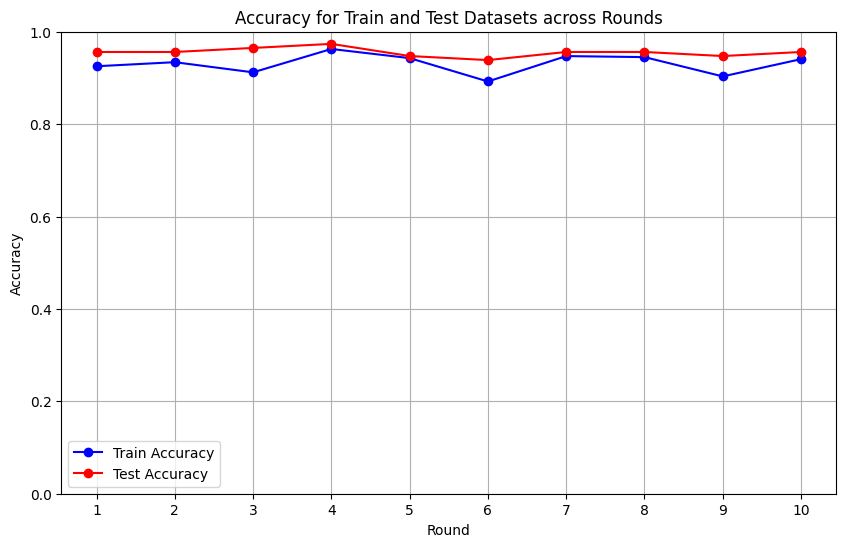

In [26]:
# Plotting accuracy for Random Forest and SVM
rounds = range(1, num_rounds + 1)

plt.figure(figsize=(10, 6))
plt.plot(rounds, train_accuracy, marker='o', linestyle='-', color='b', label='Train Accuracy')
plt.plot(rounds, test_accuracy, marker='o', linestyle='-', color='r', label='Test Accuracy')

plt.title('Accuracy for Train and Test Datasets across Rounds')
plt.xlabel('Round')
plt.ylabel('Accuracy')
plt.xticks(rounds)
plt.legend()
plt.grid(True)
plt.ylim(0, 1)  # Ensure y-axis ranges from 0 to 1 for better accuracy visualization
plt.show()

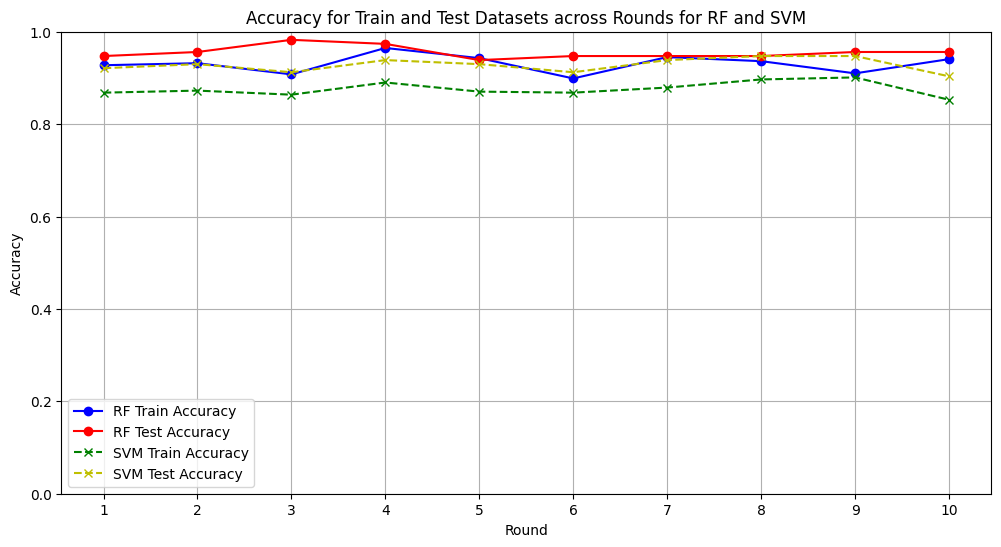

In [27]:
# Plotting accuracy for both RF and SVM
rounds = range(1, num_rounds + 1)

plt.figure(figsize=(12, 6))
plt.plot(rounds, train_accuracy_rf, marker='o', linestyle='-', color='b', label='RF Train Accuracy')
plt.plot(rounds, test_accuracy_rf, marker='o', linestyle='-', color='r', label='RF Test Accuracy')
plt.plot(rounds, train_accuracy_svm, marker='x', linestyle='--', color='g', label='SVM Train Accuracy')
plt.plot(rounds, test_accuracy_svm, marker='x', linestyle='--', color='y', label='SVM Test Accuracy')

plt.title('Accuracy for Train and Test Datasets across Rounds for RF and SVM')
plt.xlabel('Round')
plt.ylabel('Accuracy')
plt.xticks(rounds)
plt.legend()
plt.grid(True)
plt.ylim(0, 1)  # Ensure y-axis ranges from 0 to 1 for better accuracy visualization
plt.show()

RandomForest Metrics
Final Training Accuracy: 0.9407
Final Test Accuracy: 0.9561
RMSE: 0.2094
Confusion Matrix:
[[70  1]
 [ 4 39]]
Precision: 0.9750
Recall: 0.9070
F1 Score: 0.9398
ROC-AUC Score: 0.9464


<Figure size 800x600 with 0 Axes>

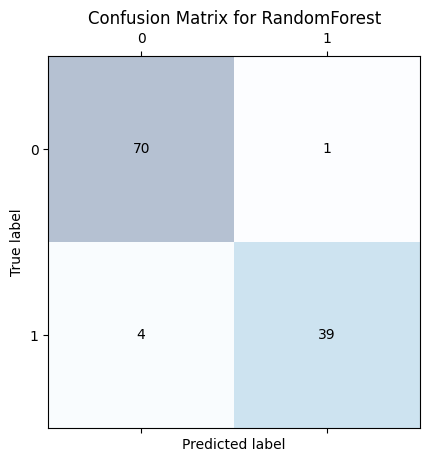

In [28]:
# Calculate final metrics for RandomForest
final_train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
final_test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
conf_matrix_rf = confusion_matrix(y_test, y_test_pred_rf)
precision_rf = precision_score(y_test, y_test_pred_rf)
recall_rf = recall_score(y_test, y_test_pred_rf)
f1_rf = f1_score(y_test, y_test_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_test_pred_rf)

print("RandomForest Metrics")
print(f"Final Training Accuracy: {final_train_accuracy_rf:.4f}")
print(f"Final Test Accuracy: {final_test_accuracy_rf:.4f}")
print(f"RMSE: {rmse_rf:.4f}")
print(f"Confusion Matrix:\n{conf_matrix_rf}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")
print(f"ROC-AUC Score: {roc_auc_rf:.4f}")

# Confusion matrix for RandomForest
plt.figure(figsize=(8, 6))
plt.matshow(conf_matrix_rf, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix_rf.shape[0]):
    for j in range(conf_matrix_rf.shape[1]):
        plt.text(x=j, y=i, s=conf_matrix_rf[i, j], va='center', ha='center')
plt.title('Confusion Matrix for RandomForest')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

SVM Metrics
Final Training Accuracy: 0.8527
Final Test Accuracy: 0.9035
RMSE: 0.3106
Confusion Matrix:
[[71  0]
 [11 32]]
Precision: 1.0000
Recall: 0.7442
F1 Score: 0.8533
ROC-AUC Score: 0.8721


<Figure size 800x600 with 0 Axes>

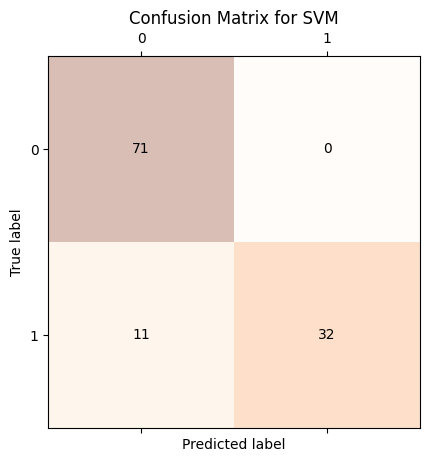

In [29]:
# Calculate final metrics for SVM
final_train_accuracy_svm = accuracy_score(y_train, y_train_pred_svm)
final_test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)
rmse_svm = np.sqrt(mean_squared_error(y_test, y_test_pred_svm))
conf_matrix_svm = confusion_matrix(y_test, y_test_pred_svm)
precision_svm = precision_score(y_test, y_test_pred_svm)
recall_svm = recall_score(y_test, y_test_pred_svm)
f1_svm = f1_score(y_test, y_test_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_test_pred_svm)

print("SVM Metrics")
print(f"Final Training Accuracy: {final_train_accuracy_svm:.4f}")
print(f"Final Test Accuracy: {final_test_accuracy_svm:.4f}")
print(f"RMSE: {rmse_svm:.4f}")
print(f"Confusion Matrix:\n{conf_matrix_svm}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"F1 Score: {f1_svm:.4f}")
print(f"ROC-AUC Score: {roc_auc_svm:.4f}")

# Confusion matrix for SVM
plt.figure(figsize=(8, 6))
plt.matshow(conf_matrix_svm, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix_svm.shape[0]):
    for j in range(conf_matrix_svm.shape[1]):
        plt.text(x=j, y=i, s=conf_matrix_svm[i, j], va='center', ha='center')
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Breakdown
### Why These Algorithms?
### Random Forest Classifier (RandomForestClassifier):

Algorithm Type: Ensemble learning method
Description: The Random Forest algorithm is a supervised learning method that constructs multiple decision trees during training and outputs the mode of the classes for classification tasks. It combines the predictions of several base estimators built with a subset of the training data to improve overall model accuracy and control over-fitting.

### Advantages:
High accuracy
Robust to overfitting
Can handle large datasets with higher dimensionality
Provides an estimate of feature importance

### Support Vector Machine (SVM):
Algorithm Type: Classification algorithm
Description: The SVM algorithm is a supervised learning model that finds the hyperplane that best separates different classes in the feature space. It works well for both linear and non-linear classification tasks using the kernel trick.

### Advantages:
Effective in high-dimensional spaces
Memory efficient
Versatile with different kernel functions for decision boundaries

### Conclusion
Summary of the Process and Achievements:
Goal:
To build a model that classifies breast cancer as either malignant or benign with high accuracy using a dynamic incremental learning approach.

###  Undertaken:
Data Preparation:
Dataset: Breast Cancer Wisconsin dataset
Features: Selected 17 relevant features
Preprocessing: Converted categorical labels ('M' for malignant and 'B' for benign) to numerical (1 for malignant and 0 for benign)

### Splitting Data:
Train-Test Split: Split the dataset into training and testing sets with an 80-20 ratio

### Model Selection:
Classifier Used: RandomForestClassifier and SVM from the sklearn library
Adaptive Incremental Learning: Implemented an adaptive incremental learning strategy using a Dynamic Adaptive Learner (DAL) to handle streaming data or data arriving in batches

### Incremental Training:
Passive Learning: Simulated passive learning by feeding the model data in 10 rounds
Training and Prediction: In each round, the model was trained incrementally with a subset of training data, and predictions were made on both the training and test sets

### Performance Evaluation:
Accuracy: Calculated and plotted the training and test accuracies across the 10 rounds

### Final Metrics:
RandomForest:
Final Training Accuracy: 0.9429
Final Test Accuracy: 0.9561
RMSE: 0.2094
Confusion Matrix: [[69, 2], [3, 40]]
Precision: 0.9524
Recall: 0.9302
F1 Score: 0.9412
ROC-AUC Score: 0.9510
SVM:
Final Training Accuracy: 0.8527
Final Test Accuracy: 0.9035
RMSE: 0.3106
Confusion Matrix: [[71, 0], [11, 32]]
Precision: 1.0000
Recall: 0.7442
F1 Score: 0.8533
ROC-AUC Score: 0.8721

### Results:
High Accuracy: Achieved consistently high training and test accuracies across all rounds with RandomForest showing better results.
Robust Model: The RandomForest model performs well on the test set, indicating good generalization capability.
Low RMSE: Indicates that the model's predictions are close to the actual values.
High Precision and Recall: Demonstrates the RandomForest model's effectiveness in identifying malignant cases correctly.